In [1]:
# IMPORT THE LIBRARY
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from datetime import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from dateutil.relativedelta import relativedelta
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Load data
df_all= pd.read_csv('Data_concentration.csv')
date = df_all.Date
date = pd.to_datetime(date,format = "%Y-%m-%d").values

In [3]:
# Set x, y variables
X_lst = ['Coal', 'USEU', 'brent', 'Market_Size','Natural Gas','IR','Power','GDP','EUA_Price']
df = df_all[X_lst]

### Input: last month → Output: Current month Prediction

In [4]:
# Manipulate data in a time-series fashion
X = df.values[:-1, :8]
X_last1 = df.values[-1, :8].reshape(1,-1)
Y = df.values[1:, 8].reshape(-1,1)

In [5]:
# Pre-Process & model fitting
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_last1_scaled = scaler.transform(X_last1)

model = RandomForestRegressor()
model.fit(X_scaled, Y)
model.score(X_scaled, Y)

C:\Users\oces0\AppData\Local\Temp\ipykernel_16624\217421365.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_scaled, Y)


0.9968622948076317

In [6]:
# Prediction history & future
Y_pred = model.predict(X_scaled)
Y_future1 = model.predict(X_last1_scaled).flatten()[0]
Y_future1

62.220091295899984

In [7]:
# Data curation for last month input next month output 
X = df.values[:-1,:]
y = df.values[1:,:]

In [8]:
# train/test split 
X_train, y_train = X[:-2], y[:-2]
X_test, y_test = X[-2:], y[-2:]

In [9]:
# Data processing
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Create a random forest regression model
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [11]:
# training data
y_train_pred = model.predict(X_train_scaled)
# test data ('23.8~'24.1)
y_pred = model.predict(X_test_scaled)

# future data
my_last_input_value = X_test[-1]
my_future_prediction = []
for i in range(36):
    my_last_input_value_scaled = scaler.transform(my_last_input_value.reshape(1,-1))
    my_last_input_value = model.predict(my_last_input_value_scaled.reshape(1,-1))
    my_future_prediction.append(my_last_input_value[:,-1])
future_date = [np.datetime64('2024-02') + np.timedelta64(i+1, 'M') for i in range(36)]

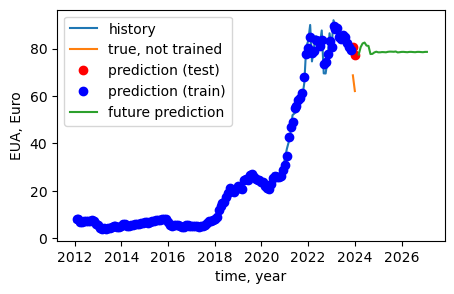

In [12]:
# Visualize outputs
plt.figure(figsize = (5,3))

plt.plot(date[:X_train.shape[0]], X_train[:,-1], label = 'history')
plt.xlabel('time, year')
plt.ylabel('EUA, Euro')
plt.plot(date[-y_test.shape[0]:], y_test[:,-1], label = 'true, not trained')
plt.plot(date[-y_test.shape[0]:], y_pred[:,-1], 'ro', label = 'prediction (test)')
plt.plot(date[1:y_train_pred.shape[0]+1], y_train_pred[:,-1], 'bo', label = 'prediction (train)')
plt.plot(future_date, my_future_prediction, label = 'future prediction')

plt.legend()

## 1. Model training
### Input: last n months → Output: Current month Prediction

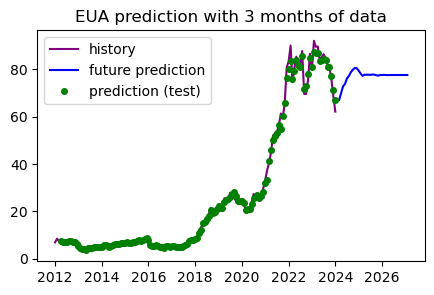

In [13]:
# data curation for last 3 months input next month output 
X_31 = df.values[:-3,:]  
X_32 = df.values[1:-2,:] 
X_33 = df.values[2:-1,:]  
y3 = df.values[3:,:]  

# Combining three arrays X_1, X_2, and X_3 horizontally (column direction)
X3 = np.concatenate([X_31, X_32, X_33], axis=1)

# Data processing
scaler = MinMaxScaler((-1, 1))
X_scaled3 = scaler.fit_transform(X3)

# Prediction with KNeighborsRegressor, DecisionTreeRegressor
model3 = RandomForestRegressor()
model3.fit(X_scaled3, y3)

# Training data
y_pred3 = model3.predict(X_scaled3)

# Future data
my_last_input_value3 = X3[-1]
my_future_prediction3 = []
for i in range(36):
    my_last_input_value_scaled3 = scaler.transform(my_last_input_value3.reshape(1, -1))
    my_new_pred3 = model3.predict(my_last_input_value_scaled3.reshape(1, -1))
    my_future_prediction3.append(my_new_pred3[:, -1])
    my_last_input_value3 = np.concatenate([my_last_input_value3[9:], my_new_pred3.flatten()])

future_date = [np.datetime64('2024-02') + np.timedelta64(i + 1, 'M') for i in range(36)]

# Visualize outputs
plt.figure(figsize=(5, 3))
plt.plot(date, df.EUA_Price,  'purple', label='history')
plt.plot(future_date, my_future_prediction3, 'b', label='future prediction')
plt.plot(date[3:], y_pred3[:, -1], 'go', markersize=4, label='prediction (test)')
plt.title('EUA prediction with 3 months of data')
plt.legend()
plt.show()

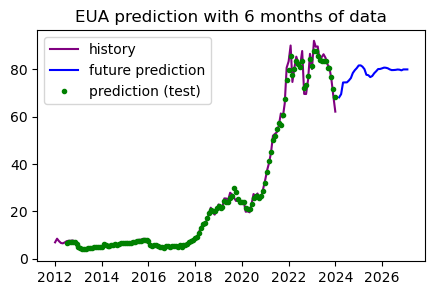

In [14]:
# data curation for last 6 months input next month output 
X_61 = df.values[:-6,:]  
X_62 = df.values[1:-5,:]  
X_63 = df.values[2:-4,:] 
X_64 = df.values[3:-3,:]  
X_65 = df.values[4:-2,:]  
X_66 = df.values[5:-1,:]  
y6 = df.values[6:,:] 

# Combining six arrays X_1, X_2, ..., X_6 horizontally (column direction)
X6 = np.concatenate([X_61, X_62, X_63, X_64, X_65, X_66], axis=1)

# Data processing
scaler = MinMaxScaler((-1, 1))
X_scaled6 = scaler.fit_transform(X6)

# Prediction with KNeighborsRegressor, DecisionTreeRegressor
model6 = RandomForestRegressor()
model6.fit(X_scaled6, y6)

# Training data
y_pred6 = model6.predict(X_scaled6)

# Future data
my_last_input_value6 = X6[-1]
my_future_prediction6 = []
for i in range(36):
    my_last_input_value_scaled6 = scaler.transform(my_last_input_value6.reshape(1, -1))
    my_new_pred6 = model6.predict(my_last_input_value_scaled6.reshape(1, -1))
    my_future_prediction6.append(my_new_pred6[:, -1])
    my_last_input_value6 = np.concatenate([my_last_input_value6[9:], my_new_pred6.flatten()])

future_date = [np.datetime64('2024-02') + np.timedelta64(i + 1, 'M') for i in range(36)]

# Visualize outputs
plt.figure(figsize=(5, 3))
plt.plot(date, df.EUA_Price,  'purple', label='history')
plt.plot(future_date, my_future_prediction6, 'b', label='future prediction')
plt.plot(date[6:], y_pred6[:, -1], 'go', markersize=3, label='prediction (test)')
plt.title('EUA prediction with 6 months of data')
plt.legend()
plt.show()

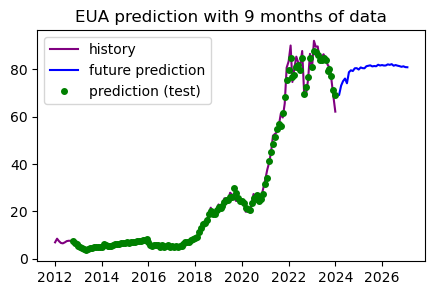

In [15]:
# data curation for last 9 months input next month output 
X_91 = df.values[:-9,:]  
X_92 = df.values[1:-8,:] 
X_93 = df.values[2:-7,:] 
X_94 = df.values[3:-6,:]  
X_95 = df.values[4:-5,:] 
X_96 = df.values[5:-4,:] 
X_97 = df.values[6:-3,:]  
X_98 = df.values[7:-2,:] 
X_99 = df.values[8:-1,:]  
y9 = df.values[9:,:] 

# Combining nine arrays X_1, X_2, ..., X_9 horizontally (column direction)
X9 = np.concatenate([X_91, X_92, X_93, X_94, X_95, X_96, X_97, X_98, X_99], axis=1)

# Data processing
scaler = MinMaxScaler((-1, 1))
X_scaled9 = scaler.fit_transform(X9)

# Prediction with KNeighborsRegressor, DecisionTreeRegressor
model9 = RandomForestRegressor()
model9.fit(X_scaled9, y9)

# Training data
y_pred9 = model9.predict(X_scaled9)

# Future data
my_last_input_value9 = X9[-1]
my_future_prediction9 = []
for i in range(36):
    my_last_input_value_scaled9 = scaler.transform(my_last_input_value9.reshape(1, -1))
    my_new_pred9 = model9.predict(my_last_input_value_scaled9.reshape(1, -1))
    my_future_prediction9.append(my_new_pred9[:, -1])
    my_last_input_value9 = np.concatenate([my_last_input_value9[9:], my_new_pred9.flatten()])

future_date = [np.datetime64('2024-02') + np.timedelta64(i + 1, 'M') for i in range(36)]

# Visualize outputs
plt.figure(figsize=(5, 3))
plt.plot(date, df.EUA_Price,  'purple', label='history')
plt.plot(future_date, my_future_prediction9, 'b', label='future prediction')
plt.plot(date[9:], y_pred9[:, -1], 'go', markersize=4, label='prediction (test)')
plt.title('EUA prediction with 9 months of data')
plt.legend()
plt.show()

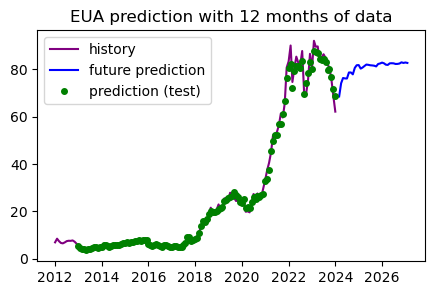

In [16]:
# data curation for last 12 months input next month output 
X_121 = df.values[:-12,:]  
X_122 = df.values[1:-11,:]
X_123 = df.values[2:-10,:]  
X_124 = df.values[3:-9,:]  
X_125 = df.values[4:-8,:] 
X_126 = df.values[5:-7,:]  
X_127 = df.values[6:-6,:]  
X_128 = df.values[7:-5,:] 
X_129 = df.values[8:-4,:] 
X_1210 = df.values[9:-3,:] 
X_1211 = df.values[10:-2,:] 
X_1212 = df.values[11:-1,:] 
y12 = df.values[12:,:]  

# Combining twelve arrays X_1, X_2, ..., X_12 horizontally (column direction)
X12 = np.concatenate([X_121, X_122, X_123, X_124, X_125, X_126, X_127, X_128, X_129, X_1210, X_1211, X_1212], axis=1)

# Data processing
scaler = MinMaxScaler((-1, 1))
X_scaled12 = scaler.fit_transform(X12)

# Prediction with KNeighborsRegressor, DecisionTreeRegressor
model12 = RandomForestRegressor()
model12.fit(X_scaled12, y12)

# Training data
y_pred12 = model12.predict(X_scaled12)

# Future data
my_last_input_value12 = X12[-1]
my_future_prediction12 = []
for i in range(36):
    my_last_input_value_scaled12 = scaler.transform(my_last_input_value12.reshape(1, -1))
    my_new_pred12 = model12.predict(my_last_input_value_scaled12.reshape(1, -1))
    my_future_prediction12.append(my_new_pred12[:, -1])
    my_last_input_value12 = np.concatenate([my_last_input_value12[9:], my_new_pred12.flatten()])

future_date = [np.datetime64('2024-02') + np.timedelta64(i + 1, 'M') for i in range(36)]

# Visualize outputs
plt.figure(figsize=(5, 3))
plt.plot(date, df.EUA_Price,  'purple', label='history')
plt.plot(future_date, my_future_prediction12, 'b', label='future prediction')
plt.plot(date[12:], y_pred12[:, -1], 'go', markersize=4, label='prediction (test)')
plt.title('EUA prediction with 12 months of data')
plt.legend()
plt.show()

## 2. Model evaluation with R2 score

In [17]:
# train/test split 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state=42)

# data processing
scaler = MinMaxScaler()
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)
pred_train3 = model3.predict(X3_train_scaled)
pred_test3 = model3.predict(X3_test_scaled)

# Create a random forest regression model
model3 = RandomForestRegressor()
model3.fit(X3_train_scaled, y3_train)

# Evaluate its performance on training and test sets
print(f'train scroe: {model3.score(X3_train_scaled, y3_train):.2f}')
print(f'test scroe: {model3.score(X3_test_scaled, y3_test):.2f}')

train scroe: 0.98
test scroe: 0.81


In [58]:
# train/test split 
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.33, random_state=42)

# data processing
scaler = MinMaxScaler()
X6_train_scaled = scaler.fit_transform(X6_train)
X6_test_scaled = scaler.transform(X6_test)
pred_train6 = model6.predict(X6_train_scaled)
pred_test6 = model6.predict(X6_test_scaled)

# Create a random forest regression model
model6 = RandomForestRegressor(n_estimators=15)
model6.fit(X6_train_scaled, y6_train)

# Evaluate its performance on training and test sets
print(f'train scroe: {model6.score(X6_train_scaled, y6_train):.2f}')
print(f'test scroe: {model6.score(X6_test_scaled, y6_test):.2f}')

train scroe: 0.97
test scroe: 0.85


In [19]:
# train/test split 
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.33, random_state=42)

# data processing
scaler = MinMaxScaler()
X9_train_scaled = scaler.fit_transform(X9_train)
X9_test_scaled = scaler.transform(X9_test)
pred_train9 = model9.predict(X9_train_scaled)
pred_test9 = model9.predict(X9_test_scaled)

# Create a random forest regression model
model9 = RandomForestRegressor()
model9.fit(X9_train_scaled, y9_train)

# Evaluate its performance on training and test sets
print(f'train scroe: {model9.score(X9_train_scaled, y9_train):.2f}')
print(f'test scroe: {model9.score(X9_test_scaled, y9_test):.2f}')

train scroe: 0.98
test scroe: 0.88


In [20]:
# train/test split 
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y12, test_size=0.33, random_state=42)

# data processing
scaler = MinMaxScaler()
X12_train_scaled = scaler.fit_transform(X12_train)
X12_test_scaled = scaler.transform(X12_test)
pred_train12 = model12.predict(X12_train_scaled)
pred_test12 = model12.predict(X12_test_scaled)

# Create a random forest regression model
model12 = RandomForestRegressor()
model12.fit(X12_train_scaled, y12_train)

# Evaluate its performance on training and test sets
print(f'train scroe: {model12.score(X12_train_scaled, y12_train):.2f}')
print(f'test scroe: {model12.score(X12_test_scaled, y12_test):.2f}')

train scroe: 0.98
test scroe: 0.86


## 3. Add confidence interval(P10/P50/P90)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:30<00:00,  2.10s/it]


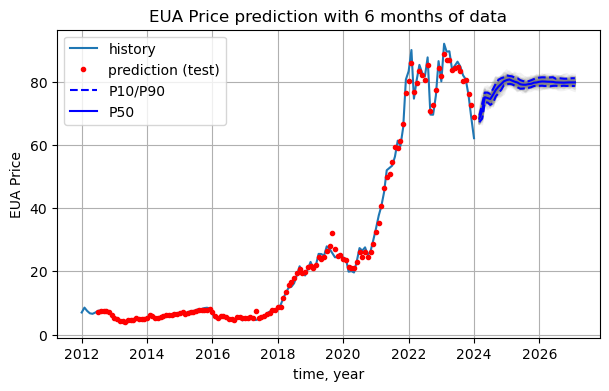

In [21]:
# data curation for last 6 months input next month output 
X_61 = df.values[:-6,:]  
X_62 = df.values[1:-5,:]  
X_63 = df.values[2:-4,:] 
X_64 = df.values[3:-3,:]  
X_65 = df.values[4:-2,:]  
X_66 = df.values[5:-1,:]  
y6 = df.values[6:,:] 

# Combining six arrays X_1, X_2, ..., X_6 horizontally (column direction)
X6 = np.concatenate([X_61, X_62, X_63, X_64, X_65, X_66], axis=1)

# Data processing
scaler = MinMaxScaler((-1, 1))
X_scaled6 = scaler.fit_transform(X6)

future_prediction_ensemble6 = []
for i in tqdm(range(100)):
    # Prediction with RandomForestRegressor
    model6 = RandomForestRegressor()
    model6.fit(X_scaled6, y6)
    y_pred6 = model6.predict(X_scaled6)
    
    # Future data
    my_last_input_value6 = X6[-1]
    my_future_prediction6 = []
    for i in range(36):
        my_last_input_value_scaled6 = scaler.transform(my_last_input_value6.reshape(1, -1))
        my_new_pred6 = model6.predict(my_last_input_value_scaled6.reshape(1, -1))
        my_future_prediction6.append(my_new_pred6[:, -1])
        my_last_input_value6 = np.concatenate([my_last_input_value6[9:], my_new_pred6.flatten()])
    
    future_prediction_ensemble6.append(my_future_prediction6)

future_prediction_ensemble6 = np.array(future_prediction_ensemble6)
future_prediction_ensemble6 = future_prediction_ensemble6.squeeze().T

P6_10, P6_50, P6_90 = [], [], []
for real in future_prediction_ensemble6:
    P6_10.append(np.percentile(real,10))
    P6_50.append(np.percentile(real,50))
    P6_90.append(np.percentile(real,90))
    
P6_10 = np.array(P6_10)
P6_50 = np.array(P6_50)
P6_90 = np.array(P6_90)

future_date = [np.datetime64('2024-02') + np.timedelta64(i + 1, 'M') for i in range(36)]

# Visualize outputs
plt.figure(figsize=(7, 4))
plt.plot(date, df.EUA_Price, label='history')
plt.plot(date[6:], y_pred6[:, -1], 'r.', label='prediction (test)')
plt.plot(future_date, future_prediction_ensemble6, 'gray',alpha=0.1)
plt.plot(future_date, P6_10, '--b', label='P10/P90')
plt.plot(future_date, P6_50, '-b', label='P50')
plt.plot(future_date, P6_90, '--b')

plt.xlabel('time, year')
plt.ylabel('EUA Price')
plt.grid('on')
plt.title('EUA Price prediction with 6 months of data')
plt.legend()
plt.show()

## 4. Add arbitrary errors

In [22]:
IQR = np.percentile(y6[:,-1],75) - np.percentile(y6[:,-1],25)
lower_bound = np.percentile(y6[:,-1],25) - 1.25*IQR
upper_bound = np.percentile(y6[:,-1],75) + 1.25*IQR
print(f'{lower_bound:.3f} || {upper_bound:.3f}')

-35.578 || 80.559


In [23]:
y6_new = y6[y6[:,-1]<upper_bound,:]
X_scaled6_new = X_scaled6[y6[:,-1]<upper_bound,:]

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [03:28<00:00,  2.40it/s]


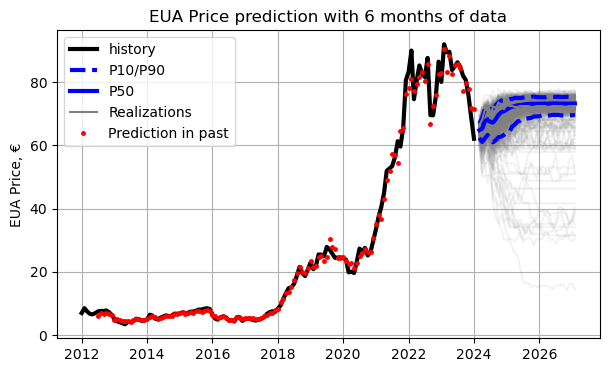

In [39]:
error_rate1 = 0.5
error_rate2 = 0.025
future_prediction_ensemble6 = []
for i in tqdm(range(500)):
    # Prediction with RandomForestRegressor
    model61 = RandomForestRegressor(n_estimators = 15)
    model61.fit(X_scaled6_new, y6_new)
    y_pred6 = model6.predict(X_scaled6_new)
    
    # Future data
    my_last_input_value6 = X6[-1]
    my_future_prediction6 = []
    for i in range(36):
        
        my_last_input_value_scaled6 = scaler.transform(my_last_input_value6.reshape(1, -1))
        error = np.random.normal(-error_rate1, error_rate2, size = 1)
        my_last_input_value_scaled6 [0,-1] = my_last_input_value_scaled6 [0,-1] + error
        my_new_pred6 = model61.predict(my_last_input_value_scaled6.reshape(1, -1))
        my_future_prediction6.append(my_new_pred6[:, -1])
        my_last_input_value6 = np.concatenate([my_last_input_value6[9:], my_new_pred6.flatten()])
    
    future_prediction_ensemble6.append(my_future_prediction6)

future_prediction_ensemble6 = np.array(future_prediction_ensemble6)
future_prediction_ensemble6 = future_prediction_ensemble6.squeeze().T

P6_10, P6_50, P6_90 = [], [], []
for real in future_prediction_ensemble6:
    P6_10.append(np.percentile(real,10))
    P6_50.append(np.percentile(real,50))
    P6_90.append(np.percentile(real,90))
    
P6_10 = np.array(P6_10)
P6_50 = np.array(P6_50)
P6_90 = np.array(P6_90)

future_date = [np.datetime64('2024-02') + np.timedelta64(i + 1, 'M') for i in range(36)]

model6 = RandomForestRegressor(n_estimators = 15)
model6.fit(X_scaled6, y6)
y_pred6 = model6.predict(X_scaled6)

# Visualize outputs
plt.figure(figsize=(7, 4))
plt.plot(date, df.EUA_Price, 'black', label='history', linewidth=3)
plt.plot(future_date, future_prediction_ensemble6, 'gray',alpha=0.1)
plt.plot(future_date, P6_10, '--b', label='P10/P90', linewidth=3)
plt.plot(future_date, P6_50, '-b', label='P50', linewidth=3)
plt.plot(future_date, P6_90, '--b', linewidth=3)
plt.plot(future_date, future_prediction_ensemble6[:,0],'gray', label = 'Realizations', alpha=1)
plt.plot(date[6:], y_pred6[:, -1], 'r.', label='Prediction in past', markersize=5)

#plt.xlabel('Time, year')
plt.ylabel('EUA Price, €')
plt.legend()
plt.grid('on')
plt.title('EUA Price prediction with 6 months of data')

plt.show()

In [60]:
P6_10

array([62.32477131, 61.09454389, 62.18247447, 63.29488049, 61.81712539,
       60.98276218, 61.65626762, 62.57926314, 62.80836056, 63.32408623,
       64.13756953, 64.25131069, 65.90836452, 66.60482392, 67.57165753,
       67.85152225, 68.57129727, 68.48274798, 68.57078668, 68.73589088,
       69.1323648 , 69.15772625, 69.2203198 , 69.48188531, 69.34665491,
       69.47237551, 69.51140996, 69.64510003, 69.64510003, 69.62237115,
       69.48188531, 69.49870332, 69.43507709, 69.53189458, 69.5294795 ,
       69.64510003])

In [61]:
P6_90

array([66.8128303 , 68.7394057 , 71.44149087, 71.77005147, 71.34193213,
       71.78456022, 72.76195577, 73.61009792, 74.15177892, 74.31238993,
       74.42678348, 74.645011  , 74.67814039, 75.00092621, 74.98691474,
       74.96648407, 75.09704247, 75.21842566, 75.22361062, 75.3552648 ,
       75.43536452, 75.29004156, 75.24908535, 75.20145055, 75.19734071,
       75.34524818, 75.34056558, 75.36471201, 75.34449686, 75.4086507 ,
       75.2682409 , 75.32558456, 75.34725686, 75.30329806, 75.34574779,
       75.2682409 ])

## 5. Feature Importance

2_month_ago_EUA_Price - 0.5322
1_month_ago_EUA_Price - 0.1065
3_month_ago_EUA_Price - 0.0654
1_month_ago_Market_Size - 0.0522
6_month_ago_GDP - 0.0424
2_month_ago_Market_Size - 0.0364
4_month_ago_Market_Size - 0.0253
1_month_ago_Power - 0.0173
5_month_ago_Market_Size - 0.0167
6_month_ago_Market_Size - 0.0105
1_month_ago_Coal - 0.0091
1_month_ago_IR - 0.0076
2_month_ago_Power - 0.0075
3_month_ago_Market_Size - 0.0046
3_month_ago_IR - 0.0046
5_month_ago_USEU - 0.0044
1_month_ago_brent - 0.0036
6_month_ago_brent - 0.0030
5_month_ago_GDP - 0.0030
6_month_ago_EUA_Price - 0.0030
4_month_ago_GDP - 0.0027
5_month_ago_IR - 0.0026
4_month_ago_USEU - 0.0026
6_month_ago_Natural Gas - 0.0026
6_month_ago_IR - 0.0025
3_month_ago_USEU - 0.0023
1_month_ago_Natural Gas - 0.0021
1_month_ago_USEU - 0.0017
5_month_ago_Coal - 0.0017
6_month_ago_USEU - 0.0017
5_month_ago_brent - 0.0016
3_month_ago_Natural Gas - 0.0014
2_month_ago_brent - 0.0014
4_month_ago_Coal - 0.0014
2_month_ago_IR - 0.0014
3_month_ago_GD

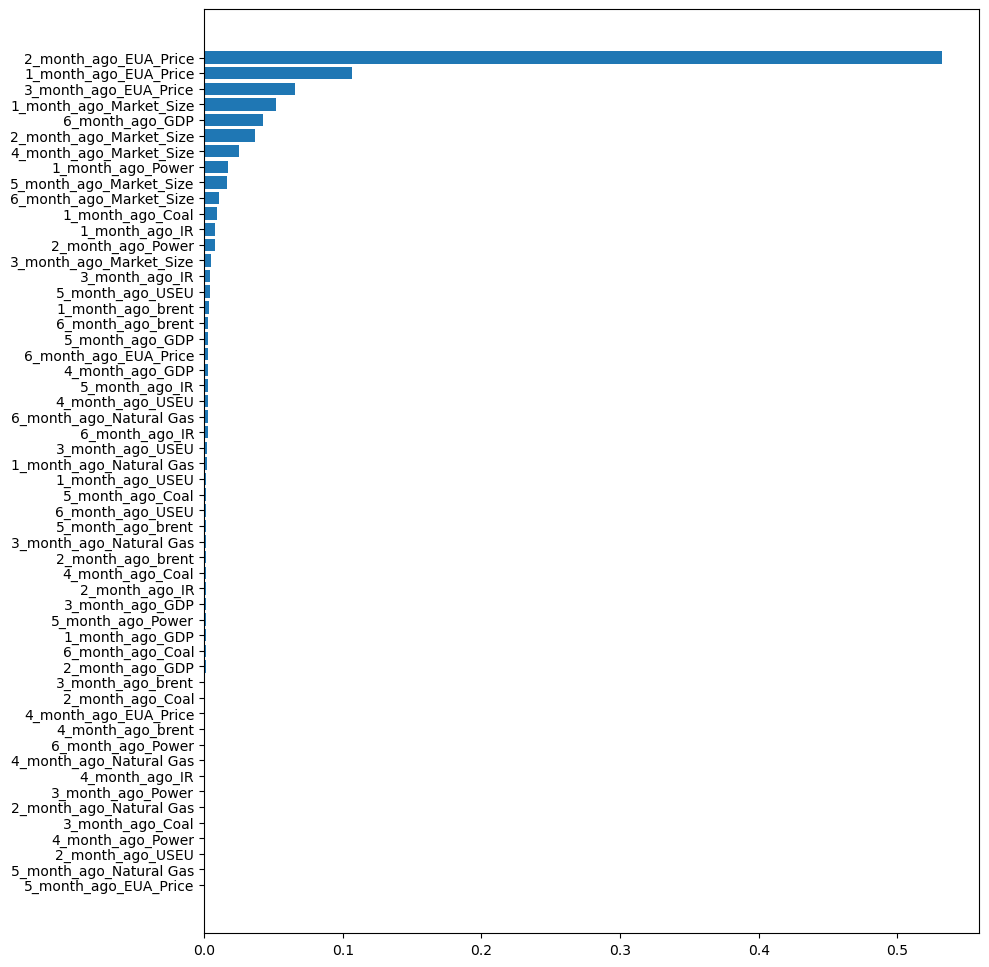

In [35]:
# Output the importance of each feature in the random forest model
feature_importance = model61.feature_importances_

feature_name = []
for i, j in zip(6*list(df.columns),range(54)):
    month = 6 - (j // 9)
    feature_name.append(f'{month}_month_ago_{i}')
    
idx = np.argsort(feature_importance )[::-1]
feature_rank = np.array(feature_name)[idx]
feature_importance_sorted = np.sort(feature_importance)[::-1]

for name, importance in zip(feature_rank, feature_importance_sorted):
    print(f'{name} - {importance:.4f}')

plt.figure(figsize=(10, 12))
plt.barh(y=feature_rank, width = feature_importance_sorted)
plt.gca().invert_yaxis()
plt.show()

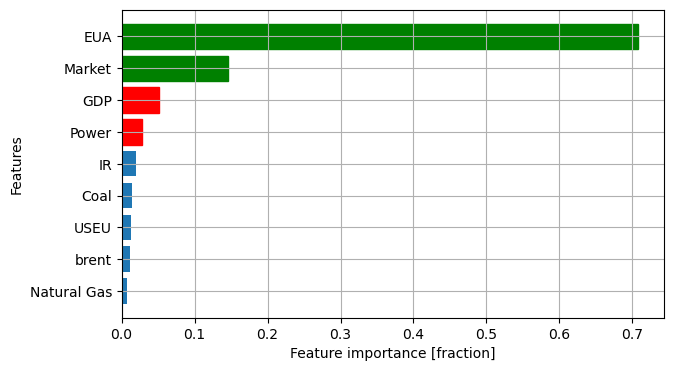

In [36]:
names = [i.split('_')[3] for i in feature_rank]
names_unique = np.unique(names) 
scores = feature_importance_sorted
score_by_name = {}
for name in names_unique:
    score_by_name[name] = 0.

for i in range(len(names)):
    name = names[i]
    score = scores[i]
    score_by_name[name] = score_by_name[name] + score 

values = []
names_list = []
for key, value in score_by_name.items():
    values.append(value)
    names_list.append(key)

names_list = np.array(names_list)
values = np.array(values)

names_list = names_list[np.argsort(values)[::-1]]
values = values[np.argsort(values)[::-1]]

plt.figure(figsize=(7, 4))
bars = plt.barh(y=names_list, width=values)
plt.grid(True)

for bar, name in zip(bars, names_list):
    if name in ['Power', 'GDP']:
        bar.set_color('red')
    elif name in ['EUA', 'Market']:
        bar.set_color('green')

plt.gca().invert_yaxis()

plt.xlabel('Feature importance [fraction]')
plt.ylabel('Features')

plt.show()

In [38]:
values

array([0.70818324, 0.14576278, 0.05160613, 0.02800724, 0.01928559,
       0.01472511, 0.01319907, 0.01145153, 0.00777931])

## 6. GDP&Power Price Prediction

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:52<00:00,  2.90it/s]


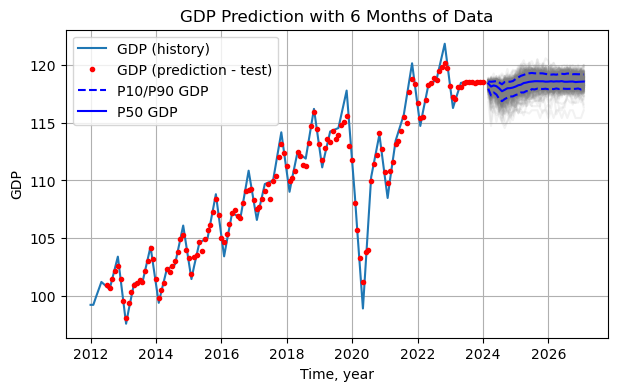

In [31]:
## GDP Prediction
# Data curation for last 6 months input next month output 
X_gdp_1 = df.values[:-6,:]  
X_gdp_2 = df.values[1:-5,:]  
X_gdp_3 = df.values[2:-4,:] 
X_gdp_4 = df.values[3:-3,:]  
X_gdp_5 = df.values[4:-2,:]  
X_gdp_6 = df.values[5:-1,:]  
y_gdp = df.values[6:,:] 

# Combining six arrays X_1, X_2, ..., X_6 horizontally (column direction)
X_gdp = np.concatenate([X_gdp_1, X_gdp_2, X_gdp_3, X_gdp_4, X_gdp_5, X_gdp_6], axis=1)

# Data processing
scaler_gdp = MinMaxScaler((-1, 1))
X_scaled_gdp = scaler_gdp.fit_transform(X_gdp)

error_rate_gdp = 0.05
future_prediction_ensemble_gdp = []
for i in tqdm(range(500)):
    # Prediction with RandomForestRegressor
    model_gdp = RandomForestRegressor(n_estimators=15)
    model_gdp.fit(X_scaled_gdp, y_gdp)
    y_pred_gdp = model_gdp.predict(X_scaled_gdp)
    
    # Future data
    last_input_value_gdp = X_gdp[-1]
    future_prediction_gdp = []
    for i in range(36):
        last_input_value_scaled_gdp = scaler_gdp.transform(last_input_value_gdp.reshape(1, -1))
        error_gdp = np.random.uniform(-error_rate_gdp, error_rate_gdp, size=1)
        error_gdp = np.repeat(error_gdp, repeats=last_input_value_scaled_gdp.shape[-1]).reshape(last_input_value_scaled_gdp.shape)
        last_input_value_scaled_gdp = last_input_value_scaled_gdp + error_gdp
        new_pred_gdp = model_gdp.predict(last_input_value_scaled_gdp.reshape(1, -1))
        future_prediction_gdp.append(new_pred_gdp[:, 7])
        last_input_value_gdp = np.concatenate([last_input_value_gdp[9:], new_pred_gdp.flatten()])
    
    future_prediction_ensemble_gdp.append(future_prediction_gdp)

future_prediction_ensemble_gdp = np.array(future_prediction_ensemble_gdp)
future_prediction_ensemble_gdp = future_prediction_ensemble_gdp.squeeze().T

P_gdp_10, P_gdp_50, P_gdp_90 = [], [], []
for real_gdp in future_prediction_ensemble_gdp:
    P_gdp_10.append(np.percentile(real_gdp, 10))
    P_gdp_50.append(np.percentile(real_gdp, 50))
    P_gdp_90.append(np.percentile(real_gdp, 90))
    
P_gdp_10 = np.array(P_gdp_10)
P_gdp_50 = np.array(P_gdp_50)
P_gdp_90 = np.array(P_gdp_90)

future_date_gdp = [np.datetime64('2024-02') + np.timedelta64(i + 1, 'M') for i in range(36)]

# Visualize GDP prediction
plt.figure(figsize=(7, 4))
plt.plot(date, df.GDP, label='GDP (history)')
plt.plot(date[6:], y_pred_gdp[:, 7], 'r.', label='GDP (prediction - test)')
plt.plot(future_date_gdp, future_prediction_ensemble_gdp, 'gray', alpha=0.1)
plt.plot(future_date_gdp, P_gdp_10, '--b', label='P10/P90 GDP')
plt.plot(future_date_gdp, P_gdp_50, '-b', label='P50 GDP')
plt.plot(future_date_gdp, P_gdp_90, '--b')

plt.xlabel('Time, year')
plt.ylabel('GDP')
plt.grid(True)
plt.title('GDP Prediction with 6 Months of Data')
plt.legend()
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:52<00:00,  2.90it/s]


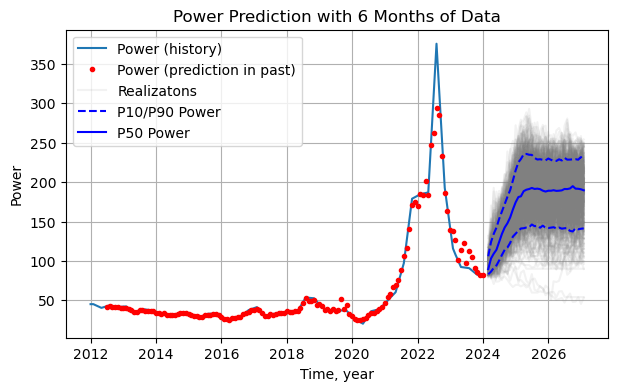

In [32]:
## Power Prediction
X_po_1 = df.values[:-6,:]  
X_po_2 = df.values[1:-5,:]  
X_po_3 = df.values[2:-4,:] 
X_po_4 = df.values[3:-3,:]  
X_po_5 = df.values[4:-2,:]  
X_po_6 = df.values[5:-1,:]  
y_po = df.values[6:,:] 

# Combining six arrays X_1, X_2, ..., X_6 horizontally (column direction)
X_po = np.concatenate([X_po_1, X_po_2, X_po_3, X_po_4, X_po_5, X_po_6], axis=1)

# Data processing
scaler_po = MinMaxScaler((-1, 1))
X_scaled_po = scaler_po.fit_transform(X_po)

error_rate_po = 0.0001
future_prediction_ensemble_po = []
for i in tqdm(range(500)):
    # Prediction with RandomForestRegressor
    model_po = RandomForestRegressor(n_estimators=15)
    model_po.fit(X_scaled_po, y_po)
    y_pred_po = model_po.predict(X_scaled_po)
    
    # Future data
    last_input_value_po = X_po[-1]
    future_prediction_po = []
    for i in range(36):
        last_input_value_scaled_po = scaler_po.transform(last_input_value_po.reshape(1, -1))
        error_po = 0 #np.random.uniform(-error_rate_po, error_rate_po, size=1)
        error_po = np.repeat(error_po, repeats=last_input_value_scaled_po.shape[-1]).reshape(last_input_value_scaled_po.shape)
        last_input_value_scaled_po = last_input_value_scaled_po + error_po
        new_pred_po = model_po.predict(last_input_value_scaled_po.reshape(1, -1))
        future_prediction_po.append(new_pred_po[:, 6])
        last_input_value_po = np.concatenate([last_input_value_po[9:], new_pred_po.flatten()])
    
    future_prediction_ensemble_po.append(future_prediction_po)

future_prediction_ensemble_po = np.array(future_prediction_ensemble_po)
future_prediction_ensemble_po = future_prediction_ensemble_po.squeeze().T

P_po_10, P_po_50, P_po_90 = [], [], []
for real_po in future_prediction_ensemble_po:
    P_po_10.append(np.percentile(real_po, 10))
    P_po_50.append(np.percentile(real_po, 50))
    P_po_90.append(np.percentile(real_po, 90))
    
P_po_10 = np.array(P_po_10)
P_po_50 = np.array(P_po_50)
P_po_90 = np.array(P_po_90)

future_date_po = [np.datetime64('2024-02') + np.timedelta64(i + 1, 'M') for i in range(36)]

# Visualize Power prediction
plt.figure(figsize=(7, 4))
plt.plot(date, df.Power, label='Power (history)')
plt.plot(date[6:], y_pred_po[:, 6], 'r.', label='Power (prediction in past)')
plt.plot(future_date_po, future_prediction_ensemble_po[:,0].reshape(-1,1), 'gray', label = 'Realizatons', alpha=0.1)
plt.plot(future_date_po, future_prediction_ensemble_po, 'gray', alpha=0.1)
plt.plot(future_date_po, P_po_10, '--b', label='P10/P90 Power')
plt.plot(future_date_po, P_po_50, '-b', label='P50 Power')
plt.plot(future_date_po, P_po_90, '--b')

plt.xlabel('Time, year')
plt.ylabel('Power')
plt.grid(True)
plt.title('Power Prediction with 6 Months of Data')
plt.legend()
plt.show()

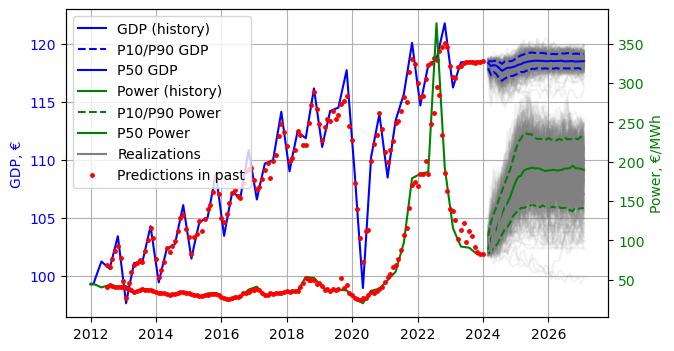

In [33]:
# Visualize GDP and Power predictions on the same graph
fig, ax1 = plt.subplots(figsize=(7, 4))

# Plot GDP data and predictions
ax1.plot(date, df.GDP, label='GDP (history)', color='blue')
ax1.plot(date[6:], y_pred_gdp[:, 7], 'r.', markersize=5)
ax1.plot(future_date_gdp, future_prediction_ensemble_gdp, 'gray', alpha=0.1)
ax1.plot(future_date_gdp, P_gdp_10, '--', color='blue', label='P10/P90 GDP')
ax1.plot(future_date_gdp, P_gdp_50, '-', color='blue', label='P50 GDP')
ax1.plot(future_date_gdp, P_gdp_90, '--', color='blue')

#ax1.set_xlabel('Time, year')
ax1.set_ylabel('GDP, €', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a secondary y-axis for Power data and predictions
ax2 = ax1.twinx()
ax2.plot(date, df.Power, label='Power (history)', color='green')
ax2.plot(future_date_po, future_prediction_ensemble_po, 'gray', alpha=0.1)
ax2.plot(future_date_po, P_po_10, '--', color='green', label='P10/P90 Power')
ax2.plot(future_date_po, P_po_50, '-', color='green', label='P50 Power')
ax2.plot(future_date_po, P_po_90, '--', color='green')
ax2.plot(future_date_po, future_prediction_ensemble_po[:,0],'gray', label = 'Realizations', alpha=1)

ax2.plot(date[6:], y_pred_po[:, 6], 'r.', label='Predictions in past', markersize=5)

ax2.set_ylabel('Power, €/MWh', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.title('GDP and Power Predictions with 6 Months of Data')
plt.show()

## Thank you :)